# Laser Slowing Plots

## Magnetic Lens, Monte Carlo Particle Trajectory Simulations

**Andrew Winnicki**<br/>
**Summer 2020**<br/>


<hr style='height:2px'>

---



### Most Recent Work

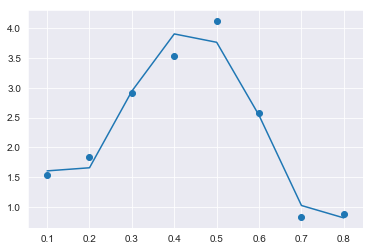

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polys = PolynomialFeatures(4, include_bias=False).fit_transform(scan_lens['l_cell_to_lens_aperture'].\
                                                                values.reshape(-1,1))
fit_model = LinearRegression().fit(polys, scan_lens['mean'])
predicts = fit_model.predict(polys)

plt.scatter(dist_lens, mean_lens)
plt.plot(scan_lens['l_cell_to_lens_aperture'], predicts)
plt.show()

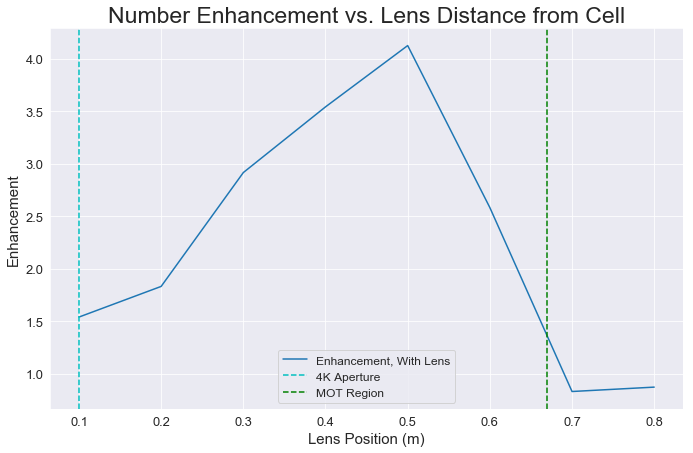

In [29]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# initialize variables
date = datetime.date.today()
l_cell_to_4k = 0.1
l_4k_to_beam_shutter = 0.26
mot_left_edge = 0.6700
trials = 2
n = 1e4

# set seaborn plotting style
sns.set_style("darkgrid")

# import csv files and convert to pandas dataframe
scan_lens = pd.read_csv('manual_test_oct8.csv')
scan_nolens = {'mean':0.0008}
# scan_nolens = pd.read_csv('2020-09-15/no_lens_2020-09-15.csv')
# scan_nolens = pd.read_csv('{}/no_lens_{}.csv'.format(date, date))

# create list of strings for column names
ints = list(range(0, trials+1))
ints = list(map(str, ints))

# add mean columns
scan_lens['mean'] = scan_lens[ints].mean(axis=1)
# scan_nolens['mean'] = scan_nolens[ints].mean(axis=1)

# # convert scan_nolens mean to reasonable value, calculate std deviation
# scan_nolens['mean'] = scan_nolens['mean'] / n
# scan_nolens['std_dev'] = scan_nolens[ints].std(axis=1)

# turn into enhancement
# scan_lens['mean'] = scan_lens['mean'] / scan_nolens['mean'][0]
scan_lens['mean'] = scan_lens['mean'] / scan_nolens['mean']

# add std deviation columns
scan_lens['std_dev'] = scan_lens[ints].std(axis=1)
scan_lens['std_dev'] = scan_lens['std_dev'] / scan_nolens['mean']
# scan_lens['std_dev'] = scan_lens['std_dev'] / scan_nolens['mean'][0]

# add in distance from cell to 4k aperture
scan_lens['l_cell_to_lens_aperture'] = scan_lens['l_cell_to_lens_aperture'] + 0.1

# drop unwanted columns
scan_lens = scan_lens.dropna(axis='columns')

# display dataframe for error checking
scan_lens

# pull relevant data from dataframes
dist_lens = scan_lens['l_cell_to_lens_aperture']
mean_lens = scan_lens['mean']
std_lens = scan_lens['std_dev']

# plot results
plt.figure(figsize=(7*1.62, 7))
sns.lineplot(dist_lens, mean_lens, label='Enhancement, With Lens')
# plt.fill_between(dist_lens, mean_lens + std_lens, mean_lens - std_lens, alpha=0.15)

# add in beam shutter, MOT region distances
plt.axvline(x=l_cell_to_4k, color='c', ls='--', label='4K Aperture')
plt.axvline(x=mot_left_edge, color='g', ls='--', label='MOT Region')

# labels
plt.title('Number Enhancement vs. Lens Distance from Cell', fontsize=23)
plt.xlabel('Lens Position (m)', fontsize=15)
plt.ylabel('Enhancement', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=12)
plt.show()

In [30]:
scan_lens

,l_cell_to_lens_aperture,0,1,2,mean,std_dev
0,0.1,0.0013,0.0014,0.0010,1.541667,0.260208
1,0.2,0.0013,0.0011,0.0020,1.833333,0.590727
2,0.3,0.0027,0.0023,0.0020,2.916667,0.438986
3,0.4,0.0018,0.0031,0.0036,3.541667,1.161447
4,0.5,0.0027,0.0026,0.0046,4.125000,1.408678
5,0.6,0.0021,0.0024,0.0017,2.583333,0.438986
6,0.7,0.0008,0.0006,0.0006,0.833333,0.144338
7,0.8,0.0005,0.0009,0.0007,0.875000,0.250000


---

In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# initialize variables
date = datetime.date.today()
l_cell_to_4k = 0.1
l_4k_to_beam_shutter = 0.26
mot_left_edge = 0.6700
trials = 5
n = 1e2

# set seaborn plotting style
sns.set_style("darkgrid")

# import csv files and convert to pandas dataframe
scan_lens = pd.read_csv('manual_test_sep16.csv')
scan_nolens = pd.read_csv('2020-09-15/no_lens_2020-09-15.csv')
# scan_nolens = pd.read_csv('{}/no_lens_{}.csv'.format(date, date))

# create list of strings for column names
ints = list(range(1, trials + 1))
ints = list(map(str, ints))

# add mean columns
scan_lens['mean'] = scan_lens[ints].mean(axis=1)
scan_nolens['mean'] = scan_nolens[ints].mean(axis=1)

# convert scan_nolens mean to reasonable value, calculate std deviation
scan_nolens['mean'] = scan_nolens['mean'] / n
scan_nolens['std_dev'] = scan_nolens[ints].std(axis=1)

# turn into enhancement
# scan_lens['mean'] = scan_lens['mean'] / scan_nolens['mean'][0]
scan_lens['mean'] = scan_lens['mean'] / 0.07

# add std deviation columns
scan_lens['std_dev'] = scan_lens[ints].std(axis=1)
scan_lens['std_dev'] = scan_lens['std_dev'] / 0.07
# scan_lens['std_dev'] = scan_lens['std_dev'] / scan_nolens['mean'][0]

# add in distance from cell to 4k aperture
scan_lens['l_cell_to_lens_aperture'] = scan_lens['l_cell_to_lens_aperture'] + 0.1

# drop unwanted columns
scan_lens = scan_lens.dropna(axis='columns')

# display dataframe for error checking
scan_lens

,l_cell_to_lens_aperture,0,1,2,3,4,5,mean,std_dev
0,0.10,0.09,0.12,0.07,0.06,0.09,0.08,1.200000,0.328882
1,0.15,0.08,0.12,0.12,0.04,0.06,0.10,1.257143,0.519026
2,0.20,0.09,0.11,0.13,0.08,0.16,0.14,1.771429,0.435656
3,0.25,0.12,0.09,0.15,0.14,0.21,0.10,1.971429,0.680636
4,0.30,0.09,0.17,0.19,0.07,0.14,0.19,2.171429,0.717137
5,0.35,0.22,0.25,0.19,0.17,0.16,0.16,2.657143,0.540219
6,0.40,0.17,0.21,0.14,0.22,0.23,0.16,2.742857,0.566046
7,0.45,0.20,0.19,0.19,0.12,0.15,0.12,2.200000,0.501019
8,0.50,0.19,0.19,0.17,0.16,0.20,0.14,2.457143,0.341067
9,0.55,0.19,0.22,0.14,0.13,0.25,0.16,2.571429,0.749149


In [15]:
scan_nolens

,l_cell_to_lens_aperture,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,mean,std_dev
0,0.3,0,2,1,1,3,1,2,1,2,...,3,2,1,1,0,1,2,4,0.016,0.894427


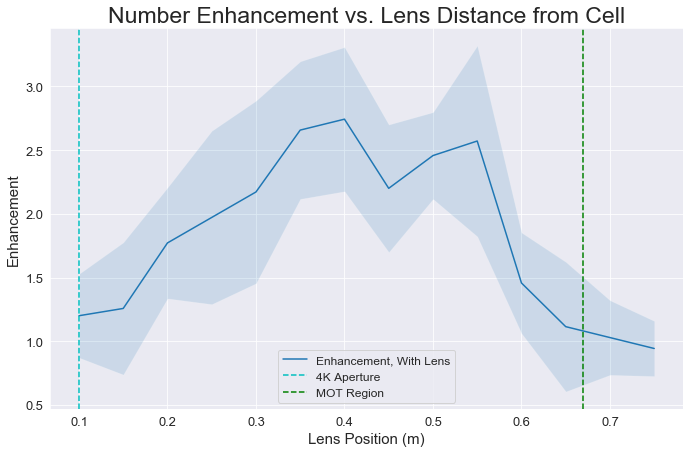

In [13]:
# pull relevant data from dataframes
dist_lens = scan_lens['l_cell_to_lens_aperture']
mean_lens = scan_lens['mean']
std_lens = scan_lens['std_dev']

# plot results
plt.figure(figsize=(7*1.62, 7))
sns.lineplot(dist_lens, mean_lens, label='Enhancement, With Lens')
plt.fill_between(dist_lens, mean_lens + std_lens, mean_lens - std_lens, alpha=0.15)

# add in beam shutter, MOT region distances
plt.axvline(x=l_cell_to_4k, color='c', ls='--', label='4K Aperture')
plt.axvline(x=mot_left_edge, color='g', ls='--', label='MOT Region')

# labels
plt.title('Number Enhancement vs. Lens Distance from Cell', fontsize=23)
plt.xlabel('Lens Position (m)', fontsize=15)
plt.ylabel('Enhancement', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=12)
plt.show()